# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.simplefilter('ignore')

/home/aman/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data Loading and Preprocessing

In [43]:
traindf = pd.read_csv("train.csv")
testdf = pd.read_csv("test.csv")
subdf = pd.read_csv("sample_submission.csv")

In [25]:
traindf.head()

,ID,Person A,Person B,Years of Knowing,Interaction Duration,Interaction Type,Moon Phase During Interaction,Friends
0,1,Alika,Alfie,3.876560,13.035115,Class,Waning_Gibbous,1
1,2,Pennie,Lolita,2.836218,5.811429,At Work,Waxing_Cresent,0
2,3,Crissy,Carree,3.006119,4.882863,Over a Meal,New_Moon,0
3,4,Eyde,Karleen,2.960067,9.274924,Social_Media,Waxing_Gibbous,0
4,5,Chrysa,Ludovika,7.640688,8.843167,Class,First_Quarter,1


In [26]:
testdf.head()

,ID,Person A,Person B,Years of Knowing,Interaction Duration,Interaction Type,Moon Phase During Interaction
0,1,Janaya,Nicolina,5.662542,14.863449,Social_Media,New_Moon
1,2,Nina,Rachelle,2.685942,3.002966,Class,Waxing_Cresent
2,3,Deborah,Veda,4.702476,13.453554,Social_Media,Waxing_Gibbous
3,4,Susanetta,Annalise,1.727021,3.780898,Class,First_Quarter
4,5,Janeczka,Bobbe,5.539269,10.626012,At Work,New_Moon


In [27]:
subdf.head()

,ID,Friends
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [28]:
traindf.isna().sum()

ID                               0
Person A                         0
Person B                         0
Years of Knowing                 0
Interaction Duration             0
Interaction Type                 0
Moon Phase During Interaction    0
Friends                          0
dtype: int64

In [29]:
traindf.isna().sum()

ID                               0
Person A                         0
Person B                         0
Years of Knowing                 0
Interaction Duration             0
Interaction Type                 0
Moon Phase During Interaction    0
Friends                          0
dtype: int64

In [30]:
np.unique(np.array(traindf["Friends"]), return_counts=True)

(array([0, 1]), array([28125, 26572]))

Heat Map

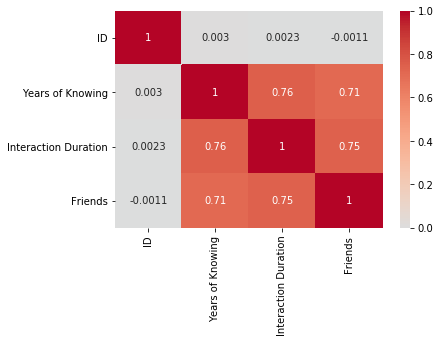

In [31]:
sns.heatmap(traindf.corr(),center=0, cmap='coolwarm', annot=True)

In [32]:
traindf["Interaction Type"].unique()

array(['Class', 'At Work', 'Over a Meal', 'Social_Media', 'Party',
       'In Passing'], dtype=object)

In [33]:
traindf["Moon Phase During Interaction"].unique()

array(['Waning_Gibbous', 'Waxing_Cresent', 'New_Moon', 'Waxing_Gibbous',
       'First_Quarter', 'Third_Quarter', 'Full_Moon', 'Waning_Cresent'],
      dtype=object)

In [34]:
def process(df):
    x = df["Years of Knowing"].values
    x = x.reshape(-1, 1)
    x = StandardScaler().fit_transform(x)
    df["Years of Knowing"] = x

    x = traindf["Interaction Duration"].values
    x = x.reshape(-1, 1)
    x = StandardScaler().fit_transform(x)
    df["Interaction Duration"] = x
    
    df1 = pd.get_dummies(df["Interaction Type"], drop_first=True)
    df2 = pd.get_dummies(df["Moon Phase During Interaction"], drop_first=True)
    df3 = pd.concat([df1, df2], axis=1)
    
    df = pd.concat([df, df3], axis=1)
    df = df.drop(["Interaction Type", "Moon Phase During Interaction"], axis=1)

    return df

In [45]:
traindf = process(traindf)
testdf = process(testdf)
traindf.head()

,ID,Person A,Person B,Years of Knowing,Interaction Duration,Friends,Class,In Passing,Over a Meal,Party,Social_Media,Full_Moon,New_Moon,Third_Quarter,Waning_Cresent,Waning_Gibbous,Waxing_Cresent,Waxing_Gibbous
0,1,Alika,Alfie,-0.229589,0.382877,1,1,0,0,0,0,0,0,0,0,1,0,0
1,2,Pennie,Lolita,-0.538188,-0.647173,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3,Crissy,Carree,-0.487790,-0.779580,0,0,0,1,0,0,0,1,0,0,0,0,0
3,4,Eyde,Karleen,-0.501450,-0.153301,0,0,0,0,0,1,0,0,0,0,0,0,1
4,5,Chrysa,Ludovika,0.886972,-0.214867,1,1,0,0,0,0,0,0,0,0,0,0,0


In [36]:
x = traindf.drop(["ID", "Person A", "Person B", "Friends"], axis=1).values
y = traindf["Friends"].values

In [37]:
trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.33, random_state=44)

# LogisticRegression

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(trainX, trainY)
print(lr.score(testX, testY))
print(classification_report(testY, lr.predict(testX)))
confusion_matrix(testY, lr.predict(testX))

0.9147415655642347
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      9321
           1       0.91      0.91      0.91      8730

    accuracy                           0.91     18051
   macro avg       0.91      0.91      0.91     18051
weighted avg       0.91      0.91      0.91     18051



array([[8562,  759],
       [ 780, 7950]])

# DecisionTreeClassifier

In [15]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(trainX, trainY)
print(dt.score(testX, testY))
print(classification_report(testY, dt.predict(testX)))
confusion_matrix(testY, dt.predict(testX))

0.8966262256938674
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      9321
           1       0.89      0.90      0.89      8730

    accuracy                           0.90     18051
   macro avg       0.90      0.90      0.90     18051
weighted avg       0.90      0.90      0.90     18051



array([[8356,  965],
       [ 901, 7829]])

# RandomForestClassifier

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(trainX, trainY)
print(rf.score(testX, testY))
print(classification_report(testY, rf.predict(testX)))
confusion_matrix(testY, rf.predict(testX))

0.9064871752257493
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      9321
           1       0.90      0.91      0.90      8730

    accuracy                           0.91     18051
   macro avg       0.91      0.91      0.91     18051
weighted avg       0.91      0.91      0.91     18051



array([[8455,  866],
       [ 822, 7908]])

# GaussianNB

In [17]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(trainX, trainY)
print(gnb.score(testX, testY))
print(classification_report(testY, gnb.predict(testX)))
confusion_matrix(testY, gnb.predict(testX))

0.9096448950196665
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      9321
           1       0.92      0.89      0.91      8730

    accuracy                           0.91     18051
   macro avg       0.91      0.91      0.91     18051
weighted avg       0.91      0.91      0.91     18051



array([[8616,  705],
       [ 926, 7804]])

# SVC

In [16]:
from sklearn.svm import SVC
svm = SVC(gamma='auto', probability=True)
svm.fit(trainX, trainY)
print(svm.score(testX, testY))
print(classification_report(testY, svm.predict(testX)))
confusion_matrix(testY, svm.predict(testX))

0.9145753697856075
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      9321
           1       0.91      0.92      0.91      8730

    accuracy                           0.91     18051
   macro avg       0.91      0.91      0.91     18051
weighted avg       0.91      0.91      0.91     18051



array([[8484,  837],
       [ 705, 8025]])

# Cross Validation Score

In [19]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(lr, x, y, cv=5).mean())
print(cross_val_score(dt, x, y, cv=5).mean())
print(cross_val_score(rf, x, y, cv=5).mean())
print(cross_val_score(gnb, x, y, cv=5).mean())
print(cross_val_score(svm, x, y, cv=5).mean())

0.9159369048870477
0.8960820725468958
0.9071430149542927
0.9110189261273212
0.9164853877234783


# Deep Neural Network Model

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical

model = Sequential()
model.add(Dense(32, activation = 'relu', input_shape = trainX[0].shape))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(trainX, to_categorical(trainY), epochs=20, verbose=1, validation_data=(testX, to_categorical(testY)))

Using TensorFlow backend.



Train on 36646 samples, validate on 18051 samples
Epoch 1/20
36646/36646 [==============================] - 2s 54us/step - loss: 0.2251 - accuracy: 0.9030 - val_loss: 0.1910 - val_accuracy: 0.9134
Epoch 2/20
36646/36646 [==============================] - 1s 38us/step - loss: 0.1856 - accuracy: 0.9171 - val_loss: 0.1874 - val_accuracy: 0.9145
Epoch 3/20
36646/36646 [==============================] - 1s 39us/step - loss: 0.1823 - accuracy: 0.9170 - val_loss: 0.1846 - val_accuracy: 0.9136
Epoch 4/20
36646/36646 [==============================] - 1s 35us/step - loss: 0.1786 - accuracy: 0.9176 - val_loss: 0.1797 - val_accuracy: 0.9152
Epoch 5/20
36646/36646 [==============================] - 1s 35us/step - loss: 0.1725 - accuracy: 0.9172 - val_loss: 0.1727 - val_accuracy: 0.9159
Epoch 6/20
36646/36646 [==============================] - 1s 35us/step - loss: 0.1665 - accuracy: 0.9180 - val_loss: 0.1686 - val_accuracy: 0.9144
Epoch 7/20
36646/36646 [==============================] - 1s 34us/s

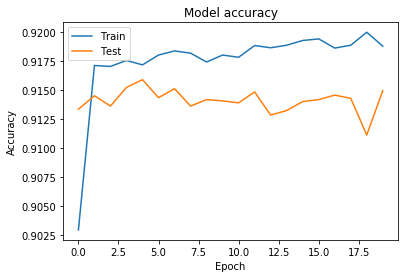

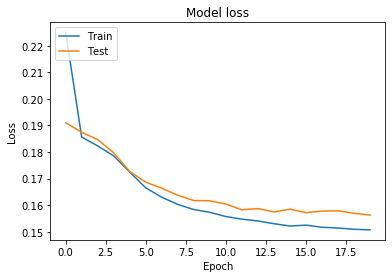

In [22]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [23]:
print(classification_report(testY, np.argmax(model.predict(testX), axis=1)))
confusion_matrix(testY, np.argmax(model.predict(testX), axis=1))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      9321
           1       0.91      0.92      0.91      8730

    accuracy                           0.91     18051
   macro avg       0.91      0.92      0.91     18051
weighted avg       0.92      0.91      0.91     18051



array([[8487,  834],
       [ 701, 8029]])

# Ensemble Learning

# Voting Classifier

In [24]:
from sklearn.ensemble import VotingClassifier
estimators = [('Logistic Regression', lr), ('Random Forest', rf), ('Naive', gnb), ('SVC', svm)]#, ('ANN', model)]
weights = [2, 1, 1, 2]#, 2]
ensemble=VotingClassifier(estimators=estimators, voting='soft', weights=weights)
ensemble.fit(trainX,trainY)
print(ensemble.score(testX, testY))
print(cross_val_score(ensemble, x, y, cv=5).mean())
print(classification_report(testY, ensemble.predict(testX)))
confusion_matrix(testY, ensemble.predict(testX))

0.9152401529001163
0.9159551814090202
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      9321
           1       0.91      0.91      0.91      8730

    accuracy                           0.92     18051
   macro avg       0.92      0.92      0.92     18051
weighted avg       0.92      0.92      0.92     18051



array([[8554,  767],
       [ 763, 7967]])

# XG Boost

In [25]:
import xgboost as xgb

trainD = xgb.DMatrix(trainX, trainY)
testD = xgb.DMatrix(testX, testY)

param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 20

model = xgb.train(param, trainD, steps)
print(classification_report(testY, np.argmax(model.predict(testD), axis=1)))
confusion_matrix(testY,  np.argmax(model.predict(testD), axis=1))

              precision    recall  f1-score   support

           0       0.95      0.88      0.92      9321
           1       0.88      0.95      0.92      8730

    accuracy                           0.92     18051
   macro avg       0.92      0.92      0.92     18051
weighted avg       0.92      0.92      0.92     18051



array([[8219, 1102],
       [ 415, 8315]])

# Stacking

In [26]:
lrTrain = lr.predict(trainX)
lrTest = lr.predict(testX)

rfTrain = rf.predict(trainX)
rfTest = rf.predict(testX)

gnbTrain = gnb.predict(trainX)
gnbTest = gnb.predict(testX)

svmTrain = svm.predict(trainX)
svmTest = svm.predict(testX)

In [27]:
trainPred = pd.DataFrame({'LR' : lrTrain, 'RF' : rfTrain, 'NB' : gnbTrain, 'svc' : svmTrain, 'y' : trainY})
testPred = pd.DataFrame({'LR' : lrTest, 'RF' : rfTest, 'NB' : gnbTest, 'svc' : svmTest, 'y' : testY})

In [28]:
trainPred.corr()

,LR,RF,NB,svc,y
LR,1.000000,0.833472,0.960423,0.983956,0.833418
RF,0.833472,1.000000,0.823103,0.835948,0.999945
NB,0.960423,0.823103,1.000000,0.950882,0.823050
svc,0.983956,0.835948,0.950882,1.000000,0.835893
y,0.833418,0.999945,0.823050,0.835893,1.000000


In [29]:
testPred.corr()

,LR,RF,NB,svc,y
LR,1.000000,0.878803,0.961380,0.981848,0.829289
RF,0.878803,1.000000,0.864653,0.882981,0.812813
NB,0.961380,0.864653,1.000000,0.951152,0.819197
svc,0.981848,0.882981,0.951152,1.000000,0.829138
y,0.829289,0.812813,0.819197,0.829138,1.000000


In [30]:
train_X = trainPred.drop(['y', 'LR', 'NB'], axis=1).values
train_Y = trainPred['y'].values

test_X = testPred.drop(['y', 'LR', 'NB'], axis=1).values
test_Y = testPred['y'].values

In [31]:
lr.fit(train_X, train_Y)
print(lr.score(test_X, test_Y))
confusion_matrix(test_Y, lr.predict(test_X))

0.9064871752257493


array([[8455,  866],
       [ 822, 7908]])

In [32]:
svm.fit(train_X, train_Y)
print(svm.score(test_X, test_Y))
confusion_matrix(test_Y, svm.predict(test_X))

0.9064871752257493


array([[8455,  866],
       [ 822, 7908]])

In [33]:
gnb.fit(train_X, train_Y)
print(gnb.score(test_X, test_Y))
confusion_matrix(test_Y, gnb.predict(test_X))

0.9064871752257493


array([[8455,  866],
       [ 822, 7908]])

# Training on full data and generation of prediction file

SVM Model seems to be best according cross validation score

In [53]:
testdf.head()

,ID,Person A,Person B,Years of Knowing,Interaction Duration,Class,In Passing,Over a Meal,Party,Social_Media,Full_Moon,New_Moon,Third_Quarter,Waning_Cresent,Waning_Gibbous,Waxing_Cresent,Waxing_Gibbous
0,1,Janaya,Nicolina,0.300753,0.382877,1,0,0,0,0,0,0,0,0,1,0,0
1,2,Nina,Rachelle,-0.585316,-0.647173,0,0,0,0,0,0,0,0,0,0,1,0
2,3,Deborah,Veda,0.014962,-0.779580,0,0,1,0,0,0,1,0,0,0,0,0
3,4,Susanetta,Annalise,-0.870766,-0.153301,0,0,0,0,1,0,0,0,0,0,0,1
4,5,Janeczka,Bobbe,0.264057,-0.214867,1,0,0,0,0,0,0,0,0,0,0,0


In [62]:
svm.fit(x, y)
testX = testdf.drop(["ID", "Person A", "Person B"], axis=1).values
pred = svm.predict(testX)
print(np.unique(np.array(pred), return_counts=True))
subdf["Friends"] = pred
print(subdf.groupby(["Friends"]).size())
subdf.to_csv("Submission.csv", index=False)

(array([0, 1]), array([28958, 25739]))
